#Machine Learning Path - Belajar Machine Learning untuk Pemula - Proyek Akhir : Klasifikasi Gambar
Nama: Aldi Tri Margiyono

In [ ]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=729ed94714269b1ab2dd1c77a5c6e9e959e18b603269ea017fcb2bc0c39ffbaa
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget

# Download the dataset
dataset = wget.download("https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip")
print(f"Downloaded dataset: {dataset}")

# Get dataset filename without extension
filename = dataset[0:-4]

Downloaded dataset: rockpaperscissors.zip


In [ ]:
import os
import zipfile

# Make list of classes
classes = ["paper", "rock", "scissors"]

# Extract the dataset but only rock, paper, and scissors folders
with zipfile.ZipFile(dataset) as myzip:
  for member in myzip.namelist():
    for dir in classes:
      if member.startswith(os.path.join(filename, dir)):
        myzip.extract(member)

# Get dataset details
print("\nDataset details:")
total = 0
for subfolder in os.listdir(filename):
  count = len(os.listdir(os.path.join(filename, subfolder)))
  print(f" {subfolder} = {count} photos")
  total += count
print(f" ----------------------\n Total= {total} photos")


Dataset details:
 scissors = 750 photos
 rock = 726 photos
 paper = 712 photos
 ----------------------
 Total= 2188 photos


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_width = 200
img_height = 200
batch_size = 10
train_data_dir = filename

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.20,
    zoom_range=0.20,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode = 'nearest',
    validation_split=0.4) # set validation split

print(f"Training data:")

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=True,
    seed=69,
    class_mode='categorical',
    subset='training') # set as training data

print(f"\nValidation data:")

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=True,
    seed=69,
    class_mode='categorical',
    subset='validation') # set as validation data

print("\nclasses:\n", train_generator.class_indices)

Training data:
Found 1314 images belonging to 3 classes.

Validation data:
Found 874 images belonging to 3 classes.

classes:
 {'paper': 0, 'rock': 1, 'scissors': 2}


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 128)       0

In [ ]:
model.compile(
    loss=tf.losses.CategoricalFocalCrossentropy(),
    optimizer=tf.optimizers.RMSprop(),
    metrics=['accuracy']
    )

In [ ]:
import time

start_time = time.time()

n_epoch = 4
result = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = n_epoch)

end_time = time.time()

timeSpent = round(end_time - start_time,3)

print("\nResult:")
print(f"Tiraining Time= {int(timeSpent//60)} minutes {int(timeSpent%60)} seconds or {int(timeSpent)} seconds")
print(f"Accuracy= {result.history['accuracy'][n_epoch-1]}")

Epoch 1/4
131/131 [==============================] - 194s 1s/step - loss: 0.1189 - accuracy: 0.4456 - val_loss: 0.0620 - val_accuracy: 0.7264
Epoch 2/4
131/131 [==============================] - 181s 1s/step - loss: 0.0436 - accuracy: 0.8367 - val_loss: 0.0486 - val_accuracy: 0.7782
Epoch 3/4
131/131 [==============================] - 165s 1s/step - loss: 0.0298 - accuracy: 0.8827 - val_loss: 0.0328 - val_accuracy: 0.8299
Epoch 4/4
131/131 [==============================] - 163s 1s/step - loss: 0.0220 - accuracy: 0.9057 - val_loss: 0.0180 - val_accuracy: 0.9264

Result:
Tiraining Time= 12 minutes 59 seconds or 779 seconds
Accuracy= 0.9056748747825623


Saving testpaper01-07.png to testpaper01-07.png
1/1 [==============================] - 0s 198ms/step

Class = paper



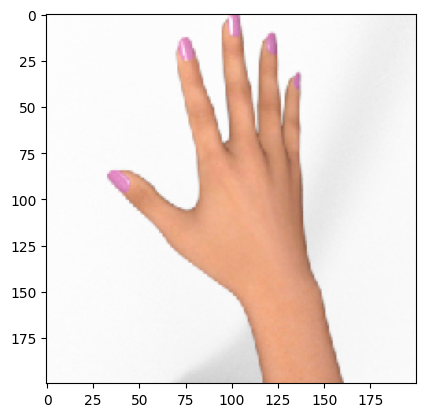

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing import image
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(img_width, img_height))
  plt.imshow(img)

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  imgClass = model.predict(images)
  probClass = list(imgClass[0])
  max_index = probClass.index(max(probClass))
  #print(f"\nProbability of classes:\n{dict(zip(classes,probClass))}")
  print(f"\nClass = {classes[max_index]}\n")